In [346]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '211102_Data'
dataname = data+'_230406_09'
filename = 'myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [347]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
0,68.91,53.53,52.17,60.41,58.15,56.95,37.80,53.66,57.93,57.05,...,60.84,48.6,77.92,55.36,52.44,71.20,0.9,0,0.00,10
1,72.39,50.49,49.50,58.63,59.09,55.21,35.90,53.66,57.93,57.96,...,60.84,47.6,77.92,53.54,51.42,70.31,0.9,0,0.00,10
2,71.23,49.73,49.50,59.52,60.03,56.95,36.85,52.76,58.84,57.96,...,61.75,48.6,78.78,53.54,53.46,70.31,0.9,0,0.00,10
3,70.07,52.01,50.39,60.41,56.27,54.34,37.80,54.56,58.84,57.05,...,59.93,47.6,77.06,54.45,52.44,69.42,0.9,0,0.00,10
4,68.91,50.49,50.39,61.30,57.21,55.21,37.80,52.76,58.84,58.87,...,61.75,51.6,79.64,54.45,51.42,70.31,0.9,0,0.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552960,68.91,51.25,49.50,57.74,57.21,56.95,34.95,57.26,61.57,57.05,...,61.75,48.6,82.22,57.18,55.50,70.31,1.8,355,230.58,151
552961,70.07,55.81,53.06,58.63,60.97,53.47,34.00,56.36,62.48,57.96,...,61.75,46.6,79.64,58.09,54.48,66.75,1.8,355,230.58,151
552962,67.75,54.29,51.28,59.52,60.03,56.95,38.75,59.06,59.75,56.14,...,62.66,48.6,78.78,57.18,55.50,67.64,1.8,355,230.58,151
552963,68.91,53.53,51.28,60.41,58.15,54.34,34.95,59.06,60.66,57.05,...,61.75,46.6,79.64,55.36,51.42,68.53,1.8,355,230.58,151


In [348]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin(list(range(37,127,3)))
SD = SDext[mask]
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
103683,67.75,54.29,52.17,60.41,62.85,56.95,38.75,55.46,57.02,57.05,...,63.57,47.6,78.78,49.90,47.34,70.31,0.9,0,130.30,37
103684,70.07,52.77,51.28,61.30,61.91,57.82,32.10,53.66,60.66,57.05,...,63.57,47.6,77.92,52.63,49.38,70.31,0.9,0,130.30,37
103685,71.23,52.01,52.17,59.52,59.09,58.69,37.80,53.66,59.75,57.05,...,63.57,47.6,81.36,51.72,50.40,70.31,0.9,0,130.30,37
103686,67.75,51.25,51.28,62.19,60.03,56.08,35.90,55.46,57.93,57.05,...,63.57,47.6,77.06,48.99,49.38,69.42,0.9,0,130.30,37
103687,68.91,53.53,53.06,63.97,61.91,55.21,37.80,51.86,57.02,57.96,...,65.39,48.6,78.78,48.08,49.38,68.53,0.9,0,130.30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449280,70.07,53.53,50.39,58.63,47.81,56.95,41.60,57.26,59.75,57.96,...,60.84,47.6,75.34,59.91,52.44,70.31,1.8,355,188.44,124
449281,70.07,55.81,51.28,58.63,48.75,57.82,36.85,58.16,59.75,54.32,...,62.66,47.6,78.78,55.36,53.46,70.31,1.8,355,188.44,124
449282,70.07,55.05,50.39,58.63,50.63,57.82,40.65,57.26,58.84,57.05,...,62.66,48.6,77.06,56.27,52.44,70.31,1.8,355,188.44,124
449283,70.07,54.29,51.28,59.52,50.63,58.69,40.65,56.36,59.75,57.96,...,61.75,46.6,78.78,55.36,51.42,67.64,1.8,355,188.44,124


In [349]:
import numpy as np
toRad = np.pi/180.0
SD['cos']=np.cos(SD['theta_enc']*toRad*2)
#SD['cos'] = (SD['cos']-SD['cos'].mean())/(SD['cos'].max()-SD['cos'].min())*2
SD['sin']=np.sin(SD['theta_enc']*toRad*2)
#SD['sin'] = (SD['sin']-SD['sin'].mean())/(SD['sin'].max()-SD['sin'].min())*2
SD['r'] = (SD['r']-SD['r'].mean())/(SD['r'].max()-SD['r'].min())*2
SD['theta_enc'] = SD['theta_enc'] - 180
SD['theta_enc'] = (SD['theta_enc']-SD['theta_enc'].mean())/(SD['theta_enc'].max()-SD['theta_enc'].min())*2
SD['z'] = (SD['z']-SD['z'].mean())/(SD['z'].max()-SD['z'].min())*2

C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_42504/3492130175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['cos']=np.cos(SD['theta_enc']*toRad*2)
C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_42504/3492130175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['sin']=np.sin(SD['theta_enc']*toRad*2)
C:\Users\JH_LAB\AppData\Local\Temp/ipykernel_42504/3492130175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [350]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z,cos,sin
103683,67.75,54.29,52.17,60.41,62.85,56.95,38.75,55.46,57.02,57.05,...,78.78,49.90,47.34,70.31,-0.999996,0,-0.269045,-1.0,-0.163326,-0.986572
103684,70.07,52.77,51.28,61.30,61.91,57.82,32.10,53.66,60.66,57.05,...,77.92,52.63,49.38,70.31,-0.999996,0,-0.269045,-1.0,-0.163326,-0.986572
103685,71.23,52.01,52.17,59.52,59.09,58.69,37.80,53.66,59.75,57.05,...,81.36,51.72,50.40,70.31,-0.999996,0,-0.269045,-1.0,-0.163326,-0.986572
103686,67.75,51.25,51.28,62.19,60.03,56.08,35.90,55.46,57.93,57.05,...,77.06,48.99,49.38,69.42,-0.999996,0,-0.269045,-1.0,-0.163326,-0.986572
103687,68.91,53.53,53.06,63.97,61.91,55.21,37.80,51.86,57.02,57.96,...,78.78,48.08,49.38,68.53,-0.999996,0,-0.269045,-1.0,-0.163326,-0.986572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449280,70.07,53.53,50.39,58.63,47.81,56.95,41.60,57.26,59.75,57.96,...,75.34,59.91,52.44,70.31,1.000004,355,0.054108,1.0,0.956915,0.290368
449281,70.07,55.81,51.28,58.63,48.75,57.82,36.85,58.16,59.75,54.32,...,78.78,55.36,53.46,70.31,1.000004,355,0.054108,1.0,0.956915,0.290368
449282,70.07,55.05,50.39,58.63,50.63,57.82,40.65,57.26,58.84,57.05,...,77.06,56.27,52.44,70.31,1.000004,355,0.054108,1.0,0.956915,0.290368
449283,70.07,54.29,51.28,59.52,50.63,58.69,40.65,56.36,59.75,57.96,...,78.78,55.36,51.42,67.64,1.000004,355,0.054108,1.0,0.956915,0.290368


In [351]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z,cos,sin
count,345602.000000,345602.000000,345602.000000,345602.000000,345602.000000,345602.000000,345602.000000,345602.000000,345602.000000,345602.000000,...,345602.000000,345602.000000,345602.000000,345602.000000,3.456020e+05,345602.000000,3.456020e+05,3.456020e+05,345602.000000,345602.000000
mean,67.780598,52.451151,51.359005,58.687062,58.149470,56.327045,34.763621,54.380136,58.415273,57.353384,...,78.567636,55.816430,51.258607,68.407896,-4.381297e-12,177.498973,-2.164584e-15,2.631625e-17,0.005198,-0.000200
std,2.671691,1.942935,2.209197,2.991960,2.653656,2.140154,4.372440,2.159615,2.313352,2.215876,...,2.399332,2.415598,2.796744,2.302439,7.453571e-01,103.913751,5.773383e-01,5.969261e-01,0.707655,0.706541
min,49.190000,35.290000,32.590000,39.050000,36.530000,37.810000,12.150000,36.560000,38.820000,37.940000,...,57.280000,34.430000,26.940000,48.950000,-9.999961e-01,0.000000,-9.930536e-01,-1.000000e+00,-1.000000,-1.000000
25%,66.590000,51.250000,50.390000,56.850000,57.210000,55.210000,32.100000,52.760000,57.930000,56.140000,...,77.920000,55.360000,50.400000,67.640000,-8.333295e-01,85.000000,-5.010990e-01,-5.172414e-01,-0.703891,-0.703891
50%,67.750000,52.770000,51.280000,59.520000,58.150000,56.950000,34.000000,54.560000,58.840000,57.960000,...,78.780000,56.270000,51.420000,68.530000,-3.333295e-01,175.000000,-5.531668e-03,0.000000e+00,0.009076,0.001396
75%,68.910000,53.530000,52.170000,60.410000,60.030000,57.820000,37.800000,55.460000,59.750000,58.870000,...,79.640000,57.180000,52.440000,69.420000,3.333372e-01,265.000000,4.986509e-01,5.172414e-01,0.715693,0.706119
max,77.030000,58.850000,58.400000,67.530000,66.610000,62.170000,55.850000,62.660000,66.120000,64.330000,...,85.660000,63.550000,59.580000,75.650000,1.000004e+00,355.000000,1.006946e+00,1.000000e+00,1.000000,1.000000


<AxesSubplot:>

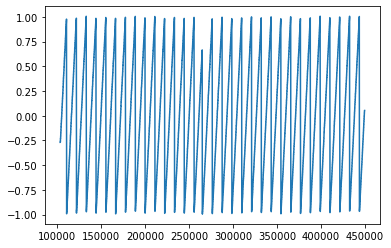

In [352]:
SDz=(SD.loc[:,'theta_enc'])
SDz.plot()

In [353]:
SDy = SD.iloc[:,24:30]
SDy.describe()

,r,theta,theta_enc,z,cos,sin
count,3.456020e+05,345602.000000,3.456020e+05,3.456020e+05,345602.000000,345602.000000
mean,-4.381297e-12,177.498973,-2.164584e-15,2.631625e-17,0.005198,-0.000200
std,7.453571e-01,103.913751,5.773383e-01,5.969261e-01,0.707655,0.706541
min,-9.999961e-01,0.000000,-9.930536e-01,-1.000000e+00,-1.000000,-1.000000
25%,-8.333295e-01,85.000000,-5.010990e-01,-5.172414e-01,-0.703891,-0.703891
50%,-3.333295e-01,175.000000,-5.531668e-03,0.000000e+00,0.009076,0.001396
75%,3.333372e-01,265.000000,4.986509e-01,5.172414e-01,0.715693,0.706119
max,1.000004e+00,355.000000,1.006946e+00,1.000000e+00,1.000000,1.000000


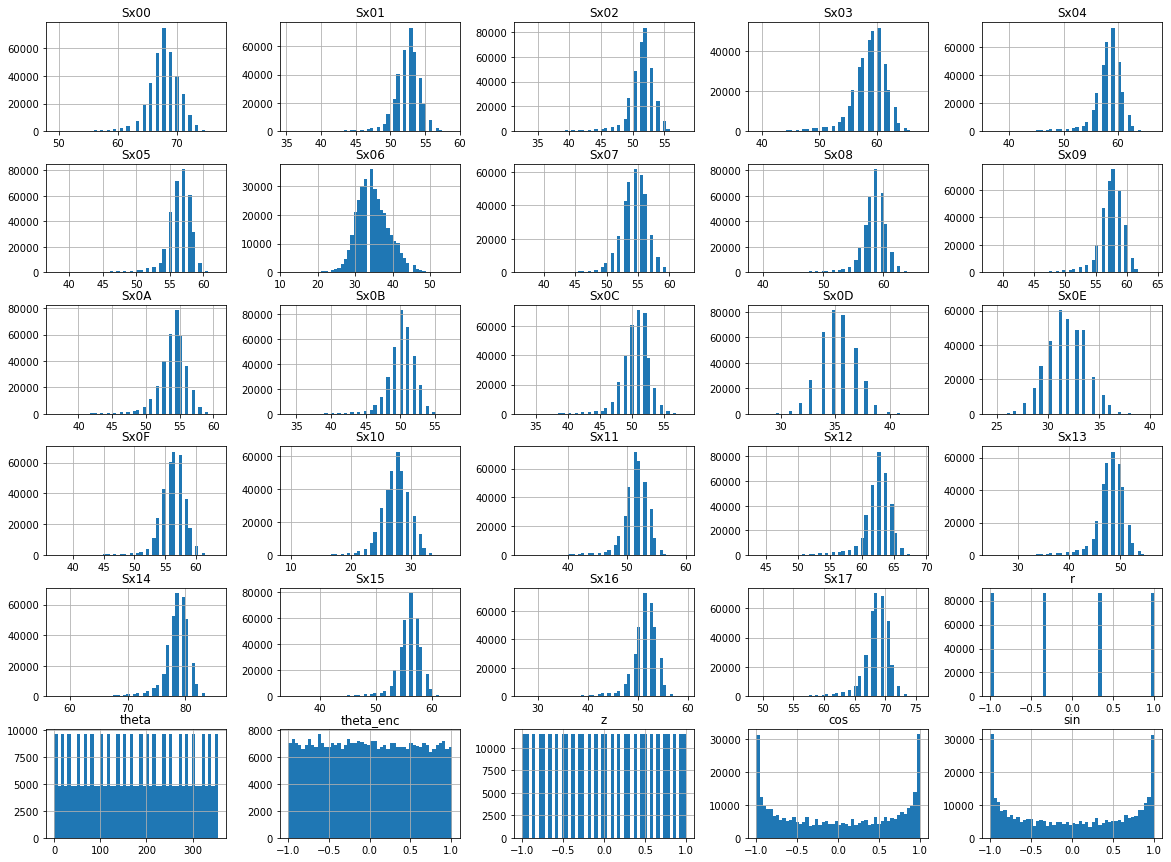

In [354]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=50, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/'+dataname+'_hist230320.png')
plt.show()

In [355]:
X = SD.iloc[:,:24]
y = SD.iloc[:,[27,28,29]]

In [356]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx0E,Sx0F,Sx10,Sx11,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17
103683,67.75,54.29,52.17,60.41,62.85,56.95,38.75,55.46,57.02,57.05,...,30.26,56.50,25.96,54.84,63.57,47.6,78.78,49.90,47.34,70.31
103684,70.07,52.77,51.28,61.30,61.91,57.82,32.10,53.66,60.66,57.05,...,30.26,56.50,25.96,53.10,63.57,47.6,77.92,52.63,49.38,70.31
103685,71.23,52.01,52.17,59.52,59.09,58.69,37.80,53.66,59.75,57.05,...,31.94,53.83,30.51,51.36,63.57,47.6,81.36,51.72,50.40,70.31
103686,67.75,51.25,51.28,62.19,60.03,56.08,35.90,55.46,57.93,57.05,...,31.10,55.61,29.60,51.36,63.57,47.6,77.06,48.99,49.38,69.42
103687,68.91,53.53,53.06,63.97,61.91,55.21,37.80,51.86,57.02,57.96,...,30.26,55.61,29.60,53.97,65.39,48.6,78.78,48.08,49.38,68.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449280,70.07,53.53,50.39,58.63,47.81,56.95,41.60,57.26,59.75,57.96,...,31.94,56.50,28.69,52.23,60.84,47.6,75.34,59.91,52.44,70.31
449281,70.07,55.81,51.28,58.63,48.75,57.82,36.85,58.16,59.75,54.32,...,28.58,55.61,28.69,52.23,62.66,47.6,78.78,55.36,53.46,70.31
449282,70.07,55.05,50.39,58.63,50.63,57.82,40.65,57.26,58.84,57.05,...,30.26,56.50,27.78,50.49,62.66,48.6,77.06,56.27,52.44,70.31
449283,70.07,54.29,51.28,59.52,50.63,58.69,40.65,56.36,59.75,57.96,...,31.94,57.39,28.69,53.10,61.75,46.6,78.78,55.36,51.42,67.64


In [357]:
y.sample(5)

,z,cos,sin
378837,0.586207,-0.799475,0.600699
377326,0.586207,0.622515,0.782608
231057,-0.241379,-0.842452,-0.538771
205853,-0.448276,0.967001,0.254771
446964,1.000000,-0.592013,-0.805928


In [358]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [359]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  207360 ea 59 %    X_valid:  69121 ea 20 %    X_test:  69121 ea 20 %


In [360]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [361]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/211102_Data_230406_09_SS.pkl']

In [422]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(3)
])
#model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.9,nesterov = True))
model.compile(loss="mse", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho = 0.9))

In [423]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 32)                800       
                                                                 
 dense_108 (Dense)           (None, 32)                1056      
                                                                 
 dense_109 (Dense)           (None, 32)                1056      
                                                                 
 dense_110 (Dense)           (None, 3)                 99        
                                                                 
Total params: 3,011
Trainable params: 3,011
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [424]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'230406_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [425]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [426]:
dataname

'211102_Data_230406_09'

In [427]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 1
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
6480/6480 [==============================] - 10s 1ms/step - loss: 0.0638 - val_loss: 0.0505
Epoch 2/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0489 - val_loss: 0.0473
Epoch 3/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0469 - val_loss: 0.0485
Epoch 4/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0463 - val_loss: 0.0470
Epoch 5/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0459 - val_loss: 0.0474
Epoch 6/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0455 - val_loss: 0.0455
Epoch 7/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0453 - val_loss: 0.0453
Epoch 8/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0451 - val_loss: 0.0451
Epoch 9/300
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0448 - val_loss: 0.0442
Epoch 10/300
6480/6480 [==============================] - 9s 1ms/step - 

In [428]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/LABS_v3_HyperParam/myModel/'+dataname+'.h5')

In [429]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

2161/2161 [==============================] - 1s 583us/step


In [430]:
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_theta","valid_z","valid_cos","valid_sin"]
valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_theta","valid_z"]
#valid_predictions_df.columns = ["valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_theta","valid_z"]
#valid_predictions_df.columns = ["valid_z"]
#valid_predictions_df.columns = ["valid_theta"]
valid_predictions_df['valid_atan2'] = np.arctan2(-valid_predictions_df['valid_sin'],-valid_predictions_df['valid_cos'])

In [431]:
# toRad = float(np.pi/180)
# toDeg = float(1/toRad)
# valid_predictions_df['valid_theta'] = valid_predictions_df['valid_z']
# for i in range(0,109487):
#     valid_predictions_df['valid_theta'][i] = math.atan2(-valid_predictions_df['valid_sin'][i],-valid_predictions_df['valid_cos'][i])*toDeg

In [432]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns = ["theta_enc","z","cos","sin"]
k_df.columns  = ["z","cos","sin"]
#k_df.columns = ["r","theta_enc","z"]
#k_df.columns  = ["cos","sin"]
#k_df.columns  = ["theta_enc","z"]
#k_df.columns  = ["z"]
#k_df.columns  = ["theta_enc"]
k_df['atan2'] = np.arctan2(-k_df['sin'],-k_df['cos'])

In [433]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,4):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
94.50% z
95.16% cos
95.41% sin
81.11% atan2


,z,cos,sin,atan2,valid_z,valid_cos,valid_sin,valid_atan2
z,1.000000,-0.000599,-0.004088,0.006216,0.944961,0.008797,0.008803,0.014748
cos,-0.000599,1.000000,0.000259,0.001170,-0.004603,0.951615,0.014630,-0.006802
sin,-0.004088,0.000259,1.000000,-0.779429,0.017438,0.009818,0.954130,-0.736820
atan2,0.006216,0.001170,-0.779429,1.000000,-0.000676,-0.014559,-0.735417,0.811072
valid_z,0.944961,-0.004603,0.017438,-0.000676,1.000000,-0.000929,0.038667,0.003600
valid_cos,0.008797,0.951615,0.009818,-0.014559,-0.000929,1.000000,0.020801,-0.015794
valid_sin,0.008803,0.014630,0.954130,-0.735417,0.038667,0.020801,1.000000,-0.767897
valid_atan2,0.014748,-0.006802,-0.736820,0.811072,0.003600,-0.015794,-0.767897,1.000000
